In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw03.ipynb")

# Homework 3: Text Analysis Using Twitter ($\mathbb{X}$)

## Cleaning and Exploring Twitter Data using RegEx

### Due Date: Thursday, September 21, 11:59 PM
You must submit this assignment to Gradescope by the on-time deadline, Thursday, September 21, at 11:59 PM. Please read the syllabus for the grace period policy. No late submissions beyond the grace period will be accepted. **We strongly encourage you to submit your work to Gradescope several hours before the stated deadline.** This way, you will have ample time to reach out to staff for support if you encounter difficulties with submission. While course staff is happy to help guide you with submitting your assignment ahead of the deadline, we will not respond to last-minute requests for assistance (TAs need to sleep, after all!).

Please read the instructions carefully to submit your work to both the coding and written portals of Gradescope.

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** at the top of your notebook.

**Collaborators**: *list collaborators here*

## This Assignment

Welcome to Homework 3! In this assignment, we will be exploring tweets from several high-profile Twitter users.  

In this assignment, you will gain practice with:
* Conducting data cleaning and EDA on a text-based dataset,
* Manipulating data in `pandas` with the `datetime` and `string` accessors,
* Writing regular expressions and using `pandas` RegEx methods, and
* Performing sentiment analysis on social media using VADER.

In [2]:
# Run this cell to set up your notebook.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from ds100_utils import *

# Ensure that pandas shows at least 280 characters in columns, so we can see full tweets.
pd.set_option('max_colwidth', 280)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")

def horiz_concat_df(dict_of_df, head=None):
    """
    Horizontally concatenante multiple DataFrames for easier visualization. 
    Each DataFrame must have the same columns.
    """
    df = pd.concat([df.reset_index(drop=True) for df in dict_of_df.values()], axis=1, keys=dict_of_df.keys())
    if head is None:
        return df
    return df.head(head)

### Score Breakdown

Question | Manual| Points
--- |---| ---
1a |No| 1
1b |No| 1
1c |No| 3
1d |Yes| 1
2a |No| 2
2b |No| 2
2c |No| 2
2d |No| 2
2e |Yes| 2
2f |Yes| 1
3a |No| 1
3b |Yes| 1
3c |No| 1
4a |Yes| 1
4b |No| 1
4ci |No| 1
4cii |No| 1
4d |No| 1
4e |No| 2
4f |No| 2
4g |Yes| 2
5a |Yes| 2
5b |Yes| 2
**Total** | **8** | **35**

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Question 1: Importing the Data

The data for this assignment was obtained using the [Twitter APIs](https://developer.twitter.com/en/docs/twitter-api). To ensure that everyone has the same data and to eliminate the need for every student to apply for a Twitter developer account, we have collected a sample of tweets from several high-profile public figures. The data is stored in the folder `data`. Run the following cell to list the contents of the directory:

In [3]:
# Run this cell to list the content, no further action is needed.
from os import listdir
for f in listdir("data"):
    print(f)

elonmusk_recent_tweets.txt
Cristiano_recent_tweets.txt
EmmanuelMacron_recent_tweets.txt
BernieSanders_recent_tweets.txt
AOC_recent_tweets.txt
BillGates_recent_tweets.txt


<br>

--- 

### Question 1a

Let's examine the contents of one of these files. Using the [`open` function](https://docs.python.org/3/library/functions.html#open) and [`read` operation](https://docs.python.org/3/tutorial/inputoutput.html#methods-of-file-objects) on a `python` file object, read the first 1000 **characters** in `data/BernieSanders_recent_tweets.txt` and store your result in the variable `q1a`.  Then display the result so you can read it.

**CAUTION: Viewing the contents of large files in a Jupyter Notebook could crash your browser! Be careful not to print the entire contents of the file.**

**Hint1:** You might want to try to use `with`:

```python
with open("filename", "r") as f:
    f.read(2)
```
**Hint2:** Since your data is stored in the `data` directory, your datapath should start with `data/...`. Absolute paths (i.e., paths that start from the root directory) will not be accepted.

In [4]:
with open('data/BernieSanders_recent_tweets.txt', 'r') as f:
    q1a = f.read(1000)
print(q1a)

[{"created_at": "Sat Feb 06 22:43:03 +0000 2021", "id": 1358184460794163202, "id_str": "1358184460794163202", "full_text": "Why would we want to impeach and convict Donald Trump \u2013 a president who is now out of office? Because it must be made clear that no president, now or in the future, can lead an insurrection against the government he or she is sworn to protect.", "truncated": false, "display_text_range": [0, 243], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": []}, "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>", "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 216776631, "id_str": "216776631", "name": "Bernie Sanders", "screen_name": "BernieSanders", "location": "Vermont", "description": "U.S. Senator for Vermont. Not me, us.", "url": "https://t.co/jpg8Sp1GhR", "entities": {"

In [5]:
grader.check("q1a")

q1a results: All test cases passed!

<br>

--- 
### Question 1b

Based on the printed output you got from `q1a`, what format is the data in? Answer this question by entering the letter corresponding to the right format in the variable `q1b` below.

**CAUTION: As a reminder, viewing the contents of large files in a Jupyter Notebook could crash your browser. Be careful not to print the entire contents of the file, and do not use the file explorer to open data files directly.**

  **A.** CSV<br/>
  **B.** HTML<br/>
  **C.** JavaScript Object Notation (JSON)<br/>
  **D.** Excel XML

Answer in the following cell. Your answer should be a string, either `"A"`, `"B"`, `"C"`, or `"D"`.

In [6]:
q1b = "C"

In [7]:
grader.check("q1b")

q1b results: All test cases passed!

<br>

--- 

### Question 1c

`pandas` has built-in readers for many different file formats, including the file format used here to store tweets.  To learn more about these, check out the documentation for `pd.read_csv` [(docs)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), `pd.read_html`[(docs)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html), `pd.read_json`[(docs)](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html), and `pd.read_excel`[(docs)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html).  

1. Use one of these functions to populate the `tweets` dictionary with the tweets for: `AOC`, `Cristiano`, and `elonmusk`. Check out the blurb above Q1a for more information on where this data is stored. The keys of `tweets` should be the handles of the users (i.e., username) --`AOC`, `Cristiano`, and `elonmusk` -- and the values should be the `DataFrames`.
2. Set the index of each `DataFrame` to correspond to the `id` of each tweet.  

**Hint1:** You might want to first try loading one of the `DataFrames` before trying to complete the entire question.

**Hint2:** This is one of the rare instances in which a `for` loop may come in handy (although it's not required to answer this question)!

**Hint3:** If your code is taking more than a few seconds to run, you should review your answers to `q1a` and `q1b`; you may have used the incorrect data loading function for the file types in this assignment.

In [8]:
tweets = {}

with open('data/AOC_recent_tweets.txt', 'r') as f:
    tweets['AOC'] = pd.read_json(f).set_index('id')

with open('data/Cristiano_recent_tweets.txt', 'r') as f:
    tweets['Cristiano'] = pd.read_json(f).set_index('id')

with open('data/elonmusk_recent_tweets.txt', 'r') as f:
    tweets['elonmusk'] = pd.read_json(f).set_index('id')


In [9]:
grader.check("q1c")

q1c results: All test cases passed!

If you did everything correctly, the following cells will show you the first 5 tweets for Elon Musk (and a lot of information about those tweets).

In [10]:
# Run this cell to show the first 5 tweets for Elon Musk, no further action is needed.
tweets["elonmusk"].head()

,created_at,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
id,,,,,,,,,,,,,,,,,,,,,
1357991946082418690,2021-02-06 09:58:04+00:00,1357991946082418688,The Second Last Kingdom https://t.co/Je4EI88HmV,False,"[0, 23]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1357991942471094275, 'id_str': '1357991942471094275', 'indices': [24, 47], 'media_url': 'http://pbs.twimg.com/media/EtiOegrVEAMCgZE.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtiOegrV...","{'media': [{'id': 1357991942471094275, 'id_str': '1357991942471094275', 'indices': [24, 47], 'media_url': 'http://pbs.twimg.com/media/EtiOegrVEAMCgZE.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtiOegrVEAMCgZE.jpg', 'url': 'https://t.co/Je4EI88HmV', 'display_url': '...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,...,352096,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
1357973565413367808,2021-02-06 08:45:02+00:00,1357973565413367808,@DumDin7 @Grimezsz Haven’t heard that name in years …,False,"[19, 53]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'DumDin7', 'name': 'Dum Din', 'id': 1279896279733145601, 'id_str': '1279896279733145601', 'indices': [0, 8]}, {'screen_name': 'Grimezsz', 'name': '𝑪𝒍𝒂𝒊𝒓𝒆 𝒅𝒆 𝑳𝒖𝒏𝒆࿎', 'id': 276540738, 'id_str': '276540738', 'indi...",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.357973e+18,1.357973e+18,...,2155,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
1357972904663687173,2021-02-06 08:42:25+00:00,1357972904663687168,@Grimezsz Dogecake,False,"[10, 18]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Grimezsz', 'name': '𝑪𝒍𝒂𝒊𝒓𝒆 𝒅𝒆 𝑳𝒖𝒏𝒆࿎', 'id': 276540738, 'id_str': '276540738', 'indices': [0, 9]}], 'urls': []}",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.357835e+18,1.357835e+18,...,5373,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
1357970517165182979,2021-02-06 08:32:55+00:00,1357970517165182976,YOLT\n\nhttps://t.co/cnOf9yjpF1,False,"[0, 29]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/cnOf9yjpF1', 'expanded_url': 'https://m.youtube.com/watch?v=05QJlF06F4s', 'display_url': 'm.youtube.com/watch?v=05QJlF…', 'indices': [6, 29]}]}",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,...,62717,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
1357964347813687296,2021-02-06 08:08:24+00:00,1357964347813687296,@Kristennetten That’s Damian,False,"[15, 28]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Kristennetten', 'name': 'K10✨', 'id': 985686123123949568, 'id_str': '985686123123949568', 'indices': [0, 14]}], 'urls': []}",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.357964e+18,1.357964e+18,...,5726,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN


<!-- BEGIN QUESTION -->

<br>

---
### Question 1d
There are many ways we could choose to read tweets. Why might someone be interested in doing data analysis on tweets? Name a kind of person or institution that might be interested in this kind of analysis. Then, give two reasons why a data analysis of tweets might be interesting or useful for them. Answer in 2-3 sentences.

X/Twitter/Big Corporations are in their interest to analyze the tweets as they get the most benefit for it.

It allows them to personalize the 'for you' page more efficiently for its consumers, the 'for you' page is something that has completely taken over social media and is what divides the successful social media from the unsuccessful. 

Furthermore, the data that they collect can be sold off to other companies in order to turn some revenue.

<!-- END QUESTION -->

<br/>

<hr style="border: 1px solid #fdb515;" />


## Question 2:  Source Analysis

In some cases, the Twitter feed of a public figure may be partially managed by a public relations firm. In these cases, the device used to post the tweet may help reveal whether it was the individual (e.g., from an iPhone) or a public relations firm (e.g., TweetDeck). The tweets we have collected contain the source information, but it is formatted strangely. Let's take a peek.

In [11]:
# Run this cell to see the source column of Cristano's tweet DataFrame, no further action is needed.
tweets["Cristiano"][["source"]]

,source
id,
1358137564587319299,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1357379984399212545,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1356733030962987008,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1355924395064233986,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1355599316300292097,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
...,...
32514882561638401,"<a href=""http://www.whosay.com"" rel=""nofollow"">WhoSay</a>"
32513604662071296,"<a href=""http://www.whosay.com"" rel=""nofollow"">WhoSay</a>"
32511823722840064,"<a href=""http://www.whosay.com"" rel=""nofollow"">WhoSay</a>"


In this question, we will use a regular expression to convert this messy HTML snippet into something more readable.  For example: `<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>` should be `Twitter for iPhone`. 

<br>

--- 
### Question 2a

We will first use `python`'s `re` library to clean up the above test string. In the cell below, write a regular expression that will match the **HTML tag** and assign it to the variable `q2a_pattern`. We then use the `re.sub` function to substitute anything that matches the pattern with an empty string `""`.

An HTML tag is defined as a `<` character followed by zero or more non-`>` characters, followed by a `>` character. That is, `<a>` and `</a>` are both considered _separate_ HTML tags.

**Note:** In this question and in all subsequent questions in this assignment that involve RegEx, the public test cases will run your RegEx pattern on several test strings. If you are failing a public test case, this is likely because your RegEx pattern does not account for a possible way in which text might be structured. See the description of the test case to help you debug your RegEx. Resources like [Regex101](https://regex101.com/) might be helpful!

**Hint**: We differentiate RegEx patterns from typical `python` strings by adding an `r` in front of the string. For example, we write `r"some_pattern"` to denote a RegEx pattern as opposed to just `"some_pattern"`.

In [12]:
q2a_pattern = r"<.*?>"
test_str = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
re.sub(q2a_pattern, "", test_str)

'Twitter for iPhone'

In [13]:
grader.check("q2a")

q2a results: All test cases passed!

<br>

--- 
### Question 2b

Rather than writing a regular expression to detect and remove the HTML tags, we could instead write a regular expression to **capture** the device name between the angle brackets. To simplify the problem, you may assume the device name is between a right angle bracket (`>`) and a left angle bracket (`<`). Here we will use [**capturing groups**](https://docs.python.org/3/howto/regex.html#grouping) by placing parenthesis around the part of the regular expression we want to return.


**Hint:** The output of the following cell should be `['Twitter for iPhone']`.

In [18]:
q2b_pattern = r">(.*?)<"
test_str = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
re.findall(q2b_pattern, test_str)

['Twitter for iPhone']

In [19]:
grader.check("q2b")

q2b results: All test cases passed!

<br>

---
### Question 2c

Using either of the two regular expressions you just created and `Series.str.replace`[(docs)](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html) or `Series.str.extract`[(docs)](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html), add a new column called `"device"` to **all** of the `DataFrames` in `tweets` containing just the text describing the device (without the HTML tags). You may use one or multiple lines.

**Note:** If you choose to use a loop to go through `tweets`, you may also find `DataFrame.assign` helpful; see the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html), but this is not necessarily required.

In [24]:
for key in (tweets.keys()):
    data = tweets[key]
    data['device'] = data['source'].str.extract(q2b_pattern)
    tweets[key] = data

In [25]:
grader.check("q2c")

q2c results: All test cases passed!

<br>

---
### Question 2d

To examine the most frequently used devices by each individual, implement the `most_freq` function that takes in a `Series` and an integer `k`, and returns a new `Series` containing the `k` most commonly occurring entries in the input Series object, where the values are the counts of the entries and the indices are the entries themselves.

For example: 
```python
most_freq(pd.Series(["A", "B", "A", "C", "B", "A"]), k=2)
```
would return:
```
A    3
B    2
dtype: int64
```

In [26]:
def most_freq(series, k = 5):
    value = series.value_counts()[:k]
    return value

most_freq(tweets["Cristiano"]['device'])

device
Twitter for iPhone     1183
Twitter Web Client      959
WhoSay                  453
MobioINsider.com        144
Twitter for Android     108
Name: count, dtype: int64

In [27]:
grader.check("q2d")

q2d results: All test cases passed!

Run the following two cells to compute a table and plot describing the top 5 most commonly used devices for each user.

In [28]:
# Run this cell to compute a table, no further action needed.
device_counts = pd.DataFrame(
    [most_freq(tweets[name]['device']).rename(name)
     for name in tweets]
).fillna(0)
device_counts

device,Twitter for iPhone,Twitter Media Studio,Twitter Web Client,WhoSay,MobioINsider.com,Twitter for Android,Twitter Web App
AOC,3245.0,2.0,0.0,0.0,0.0,0.0,0.0
Cristiano,1183.0,0.0,959.0,453.0,144.0,108.0,0.0
elonmusk,3202.0,0.0,0.0,0.0,0.0,0.0,37.0


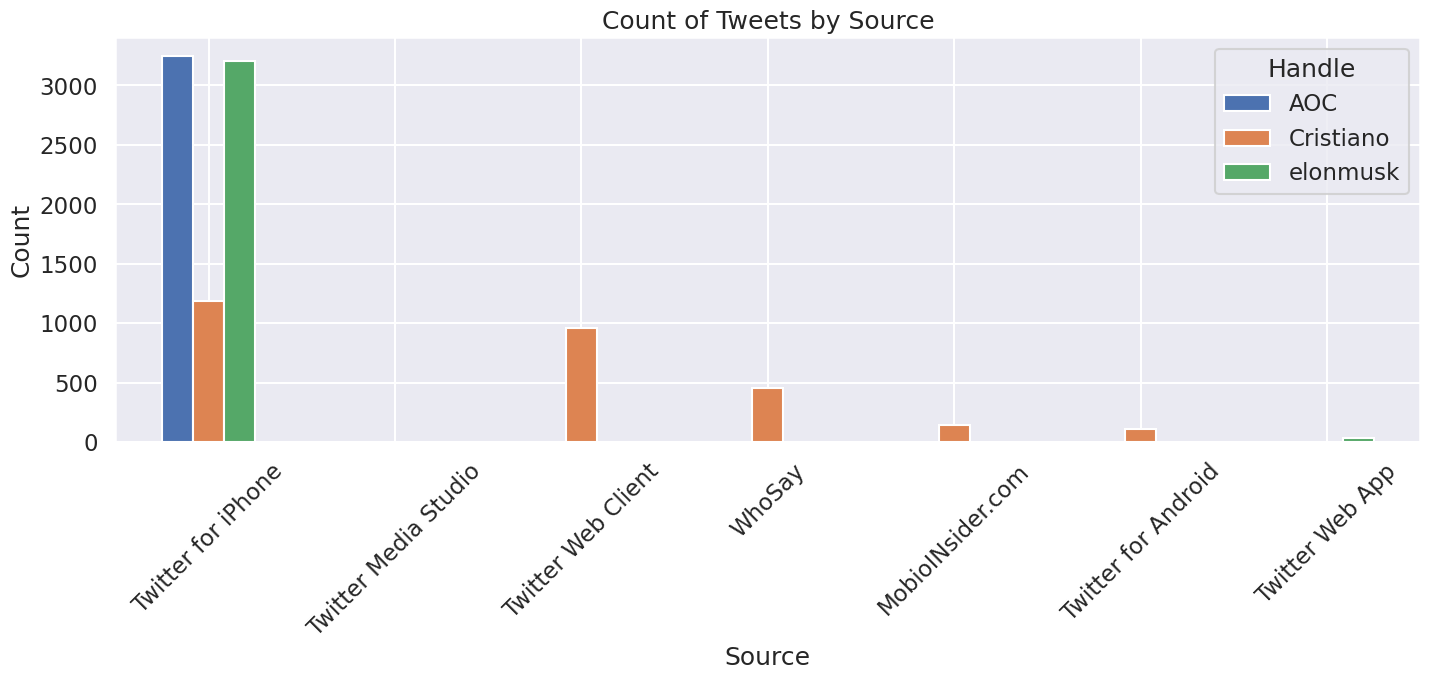

In [29]:
# Run this cell to generate the plot, no further action needed.
make_bar_plot(device_counts.T, title="Count of Tweets by Source",
               xlabel="Source", ylabel="Count")
plt.xticks(rotation=45)
plt.legend(title="Handle");

<!-- BEGIN QUESTION -->

<br>

---
### Question 2e

Given the plot above, what might we want to investigate during EDA? Name some possible questions you may have about the dataset in light of the information shown in the plot.

Why does Cristiano use so many different devices? Why do the twitter counts change so much? Is it useful to have these extra sources if only one person uses them?

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

---
### Question 2f

We just looked at the top 5 most commonly used devices for each user. However, we used the number of tweets as a measure when it might be better to compare these distributions by comparing _proportions_ of tweets (i.e., what percentage of all tweets for a user were published from each device). Why might the proportions of tweets be better measures than the number of tweets?


Because the amount of tweets a twitter user tweets varies from person to person. Some people may tweet a few hundred, some a few thousand. If we are trying to investigate devices and only devices, it would be more important to figure out their time spread out between each device not the count from each device per user.

<!-- END QUESTION -->

<br/>

<hr style="border: 1px solid #fdb515;" />


## Question 3: When?

Now that we've explored the sources of each of the tweets, we will perform some time series analysis. A look into the temporal aspect of the data could reveal insights about how a user spends their day, when they eat and sleep, etc. In this question, we will focus on the time at which each tweet was posted.


<br>

---
### Question 3a

Complete the following function `add_hour` that takes in a tweet `DataFrame` `df`, and two variables `time_col` and `result_col` representing the string names of the associated columns in `df`. Your function should use the timestamps in the `time_col` column to store in a new column, `result_col` the computed hour of the day as a floating point number according to the formula:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^{2}}
$$

**Note:** The below code calls your `add_hour` function and updates each tweet `DataFrame` by using the `created_at` timestamp column to calculate and store the `hour` column.

**Hint:** See the following link for an example of working with timestamps using the [`dt` accessors](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#dt-accessor). 


In [32]:
def add_hour(df, time_col, result_col):
    df[result_col] = df[time_col].dt.hour + df[time_col].dt.minute/60 + df[time_col].dt.second/(60*60)
    return df

# Do not modify the below code.
tweets = {handle: add_hour(df, "created_at", "hour") for handle, df in tweets.items()}
tweets["AOC"]["hour"].head()

id
1358149122264563712    20.377222
1358147616400408576    20.277500
1358145332316667909    20.126389
1358145218407759875    20.118611
1358144207333036040    20.051667
Name: hour, dtype: float64

In [33]:
grader.check("q3a")

q3a results: All test cases passed!

With our new `hour` column, let's take a look at the distribution of tweets for each user by time of day. The following cell helps create a line plot on the number of tweets based on the hour they are posted. 

The function `bin_df` takes in a `DataFrame`, an array of bins, and a column name; it bins the the values in the specified column, returning a `DataFrame` with the bin lower bound and the number of elements in the bin. This function uses [`pd.cut`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html), a `pandas` [utility](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) for binning numerical values that you may find helpful in the distant future.

Run the cell and answer the following question about the plot.

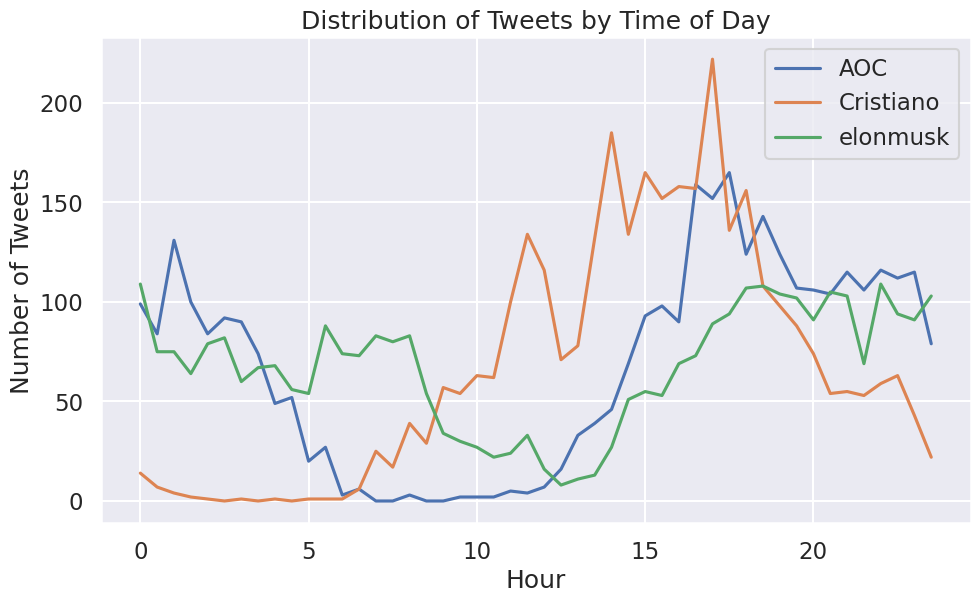

In [34]:
# Run this cell to generate the plot, no further action is needed.
def bin_df(df, bins, colname):
    binned = pd.cut(df[colname], bins).value_counts().sort_index()
    return pd.DataFrame({"counts": binned, "bin": bins[:-1]})

hour_bins = np.arange(0, 24.5, .5)
binned_hours = {handle: bin_df(df, hour_bins, "hour") for handle, df in tweets.items()}

make_line_plot(binned_hours, "bin", "counts", title="Distribution of Tweets by Time of Day",
               xlabel="Hour", ylabel="Number of Tweets")

<!-- BEGIN QUESTION -->

<br>

---
### Question 3b
Compare Cristiano's distribution with those of AOC and Elon Musk. In particular, compare the distributions before and after Hour 6. What differences did you notice? What might be a possible cause of that? Do the data plotted above seem reasonable?

**Hint:** If you are not familiar with who Cristiano, AOC, and Elon Musk are, it may be helpful to Google information about these people, their occupations, and where they live.

AOC and Elon Musk are signficantly more active before hour 6 compared to Cristiano. This might be due to multiple differences.

AOC and Elon Musk are people that would benefit significantly more from tweeting. Garnering attention or support through social media is more impactful in their lives whereas Cristiano might be practicing for Soccer or doing things that are more important. Another potential explanation would be the fact that they live in different timezones so while Cristiano would be sleeping between hour 24 and hour 6, Elon Musk and AOC sleep between hour 8 and hour 14 roughly. 

<!-- END QUESTION -->

<br>

---
### Question 3c

To account for the different locations of each user in our analysis, we will next adjust the `"created_at"` timestamp for each tweet to the respective timezone of each user. Complete the following function `convert_timezone` that takes in a tweet `DataFrame` `df` and a timezone `new_tz` and adds a new column `"converted_time"` that has the adjusted `"created_at"` timestamp for each tweet. The provided code at the bottom of the cell will run your `convert_timezone` function to convert the time zones of each user to the appropriate location.

**Hint:** Please see the following link for an example of working with [`dt` accessors](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#dt-accessor).


In [37]:
def convert_timezone(df, new_tz):
    df['converted_time'] = df['created_at'].dt.tz_convert(new_tz)
    return df

timezones = {"AOC": "EST", "Cristiano": "Europe/Lisbon", "elonmusk": "America/Los_Angeles"}

tweets = {handle: convert_timezone(tweets[handle], timezones[handle]) for handle in tweets.keys()}

In [38]:
grader.check("q3c")

q3c results: All test cases passed!

With our adjusted timestamps for each user based on their timezone, let's take a look again at the distribution of tweets by time of day.

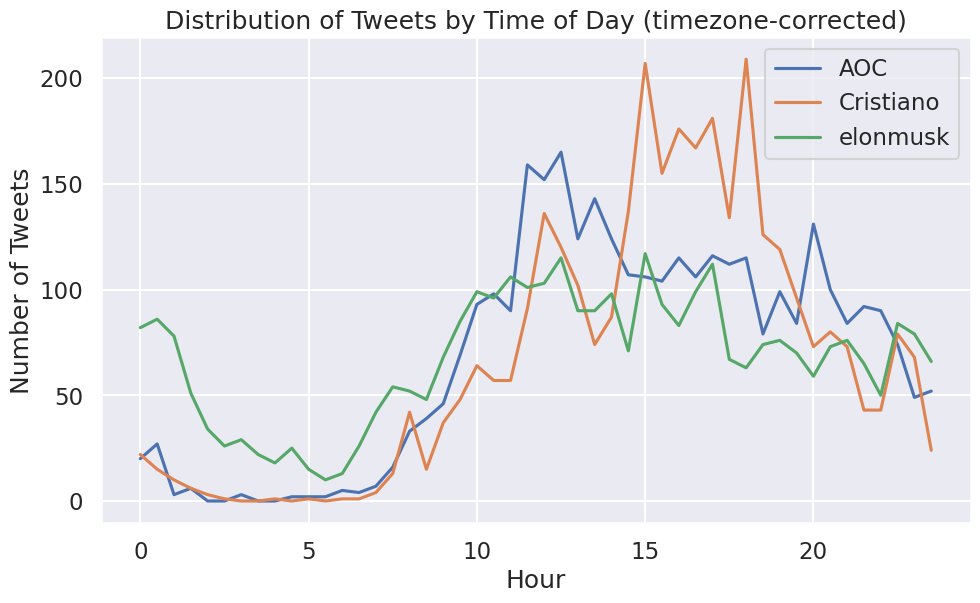

In [39]:
# Run this cell to generate the plot, no further action is needed.
tweets = {handle: add_hour(df, "converted_time", "converted_hour") for handle, df in tweets.items()}
binned_hours = {handle: bin_df(df, hour_bins, "converted_hour") for handle, df in tweets.items()}

make_line_plot(binned_hours, "bin", "counts", title="Distribution of Tweets by Time of Day (timezone-corrected)",
               xlabel="Hour", ylabel="Number of Tweets")

<br/>

<hr style="border: 1px solid #fdb515;" />


## Question 4: Sentiment Analysis


In the past few questions, we have explored the sources of the tweets and when they are posted. Although on their own, they might not seem particularly intricate, combined with the power of regular expressions, they could actually help us infer a lot about the users. In this section, we will continue building on our past analysis and specifically look at the **sentiment of each tweet** -- this would lead us to a much more direct and detailed understanding of how users view certain subjects and people. **Sentiment analysis** is generally the computational task of classifying the emotions in a body of text as positively or negatively charged.

<br/>
How do we actually measure the sentiment of each tweet? In our case, we can use the words in the text of a tweet for our calculation! For example, the word "love" within the sentence "I love America!" has a positive sentiment, whereas the word "hate" within the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive/negative sentiments than others: "I love America." is more positive than "I like America."

We will use the VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon ([github](https://github.com/cjhutto/vaderSentiment), [original paper](https://doi.org/10.1609/icwsm.v8i1.14550)) to analyze the sentiment of AOC's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media and is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [40]:
# Run this cell to print the first 10 rows, no further action needed.
print(''.join(open("vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



As you can see, the lexicon contains emojis too! Each row contains a word ("token") and various measures of the **polarity** of that word, measuring how positive or negative the word is, on a scale of -4 (extremely negative) to +4 (extremely positive). We explain more below.

### VADER Sentiment Analysis

VADER ([github](https://github.com/cjhutto/vaderSentiment), [original paper](https://doi.org/10.1609/icwsm.v8i1.14550)) is a tool that can quantitatively describe the polarity or "sentiment" of a word.

VADER doesn't "read" sentences but works by parsing sentences into words, assigning a preset generalized score from their testing sets to each word separately. 

VADER relies on humans to stabilize its scoring. The creators use Amazon Mechanical Turk, a crowdsourcing survey platform, to train its model. Its training data consists of a small corpus of tweets, New York Times editorials and news articles, Rotten Tomatoes reviews, and Amazon product reviews, tokenized using the natural language toolkit (NLTK). Each word in each dataset was reviewed and rated on a scale of -4 (extremely negative) to 4 (extremely positive) by at least 10 trained individuals who had signed up to work on these tasks through Mechanical Turk. 


<!-- BEGIN QUESTION -->

<br>

---
### Question 4a
Using your own personal interpretation, please score the sentiment of one of the following words using the VADER scale (-4 means the word is extremely negative. +4 means the word is extremely positive). No code is required for this question!

- order
- dog
- cat
- technology
- TikTok
- security
- science
- climate change

What score did you give it and why? Can you describe a situation where this word would carry the opposite sentiment to the one you’ve just assigned? If not, explain why.


'TikTok' = -2.

I gave it a -2 because even the people that use the app are aware that the app is not a healthy thing to use. It has a lot of recognition, and a large amount of the population uses it on a regular basis. It has changed the global landscape in terms of trends and other such things. But it is also noted that it is not something that is healthy. I personally only use it since that is how my girlfriend sends me funny videos and such, and maybe she would carry the opposite sentiment as to her it is what she uses to get through some parts of her day. Her daily trip to work, or maybe even sometimes on break, she would use it to pass the time and not be bored.

<!-- END QUESTION -->

**Optional (ungraded):** Are there circumstances (e.g. certain kinds of language or data) when you might not want to use VADER? What features of human speech might VADER misrepresent or fail to capture?

_Type your answer here, replacing this text._

<br>

---
### Question 4b

Let's first load the data containing all the sentiments. 
In `vader_lexicon.txt`, each row contains the word (token), average polarity, the standard deviation of polarity, and the "raw polarity ratings" of each of the 10 human raters. See the description of `vader_lexicon.txt` given in the documentation [here](https://github.com/cjhutto/vaderSentiment#resources-and-dataset-descriptions) for more information about each of these measures.

Read `vader_lexicon.txt` into a new `DataFrame` called `sent`. The index of the `DataFrame` should be the words in the lexicon and should be named `token`. `sent` should have one column named `polarity`, storing the average polarity of each word. We will not incorporate the polarity standard deviation and raw ratings for this exercise. The first five entries of `sent` should look like this:

token | polarity
--- |---
**$:** | -1.5
**%)** | -0.4
**%-)**| -1.5
**&-:**| -0.4
**&:** | -0.7

**Note:** If you're confused as to why the first few entries of `sent` don't seem to be words, don't worry: it's because VADER also includes the polarities of emoticons as well!

**Hint1:** The `pd.read_csv` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)) function may help here. 

**Hint2:** Since the file is tab-separated, be sure to read the documentation on how to set the separator with `pd.read_csv`'s parameter `sep`. To check your work, the first token should be `$:`.

**Hint3:** Is there a header (that is, data that can be used as column names) in the CSV file, and how can you account for this?


In [44]:
vader_lex = pd.read_csv('vader_lexicon.txt', sep='\t', header=None)
sent = vader_lex.rename(columns={0 : 'token', 1 : 'polarity'}).set_index('token').drop(columns=[2,3], axis=1)
sent.head()

,polarity
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [45]:
grader.check("q4b")

q4b results: All test cases passed!

<br>

---
### Question 4c

Before further analysis, we will need some more tools that can help us extract the necessary information and clean our data.

Complete the following regular expressions that will help us match part of a tweet that we either (i) want to remove or (ii) are interested in learning more about.

#### **Question 4c, Part i**
Assign a regular expression to a new variable, `punct_re`, that captures all of the punctuations within a tweet. We consider punctuation to be any non-word, non-whitespace character.

**Note**: A word character is any character that is alphanumeric or an underscore. A whitespace character is any character that is a space, a tab, a new line, or a carriage return.


In [46]:
punct_re = r"[^\w\s]"

re.sub(punct_re, " ", tweets["AOC"].iloc[0]["full_text"])

'RT  RepEscobar  Our country has the moral obligation and responsibility to reunite every single family separated at the southern border \n\nT '

In [47]:
grader.check("q4ci")

q4ci results: All test cases passed!

#### **Question 4c, Part ii**
Assign a regular expression to a new variable, `mentions_re`, that matches any mention in a tweet. Your regular expression should use a capturing group to extract the user's username in a mention. The `@` sign preceding the username should not be extracted from the tweet.

**Hint**: a user mention within a tweet always starts with the `@` symbol and is followed by a series of word characters (with no space in between). For more explanations on what a word character is, check out the **Note** section in Question 4c, Part i.


In [51]:
mentions_re = r"@{1}(\w+)"

re.findall(mentions_re, tweets["AOC"].iloc[0]["full_text"])

['RepEscobar']

In [52]:
grader.check("q4cii")

q4cii results: All test cases passed!

<br/>

### Tweet Sentiments and User Mentions

As you have seen in the previous part of this question, there are actually a lot of interesting components that we can extract out of a tweet for further analysis! For the rest of this question though, we will focus on one particular case: the sentiment of each tweet in relation to the users mentioned within it. 

To calculate the sentiments for a sentence, we will follow this procedure:

1. Remove the punctuation from each tweet so we can analyze the words.
2. For each tweet, find the sentiment of each word.
3. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

<br>

---
### Question 4d

Let's use our `punct_re` regular expression from the previous part to clean up the text a bit more! The goal here is to remove all of the punctuation to ensure words can be properly matched with those from VADER to actually calculate the full sentiment score.

Complete the following function `sanitize_texts` that takes in a `DataFrame` `df` and adds a new column `clean_text` by converting all characters in its original `"full_text"` column **to lowercase** and **replace all instances of punctuation with a space character**.


In [55]:
def sanitize_texts(df):
    full = df['full_text']
    df['clean_text'] = full.str.lower().str.replace(punct_re, ' ', regex=True)
    return df

tweets = {handle: sanitize_texts(df) for handle, df in tweets.items()}
tweets["AOC"]["clean_text"].head()

id
1358149122264563712                                                                                       rt  repescobar  our country has the moral obligation and responsibility to reunite every single family separated at the southern border \n\nt 
1358147616400408576                                                                                      rt  rokhanna  what happens when we guarantee  15 hour \n\n  31  of black workers and 26  of latinx workers get raises \n  a majority of essent 
1358145332316667909                                                                                                                                                                                                     source  https   t co 3o5jer6zpd 
1358145218407759875                                                 joe cunningham pledged to never take corporate pac money  and he never did  mace said she ll cash every check she gets  yet another way this is a downgrade  https   t co dytsqxkxgu
1

In [56]:
grader.check("q4d")

q4d results: All test cases passed!

<br>

---
### Question 4e
With the sanitized texts, we can extract all the user mentions from tweets. 

Complete the following function `extract_mentions` that takes in a `Series` containing the values stored in the `"full_text"` column from a tweet `DataFrame` and uses `mentions_re` to extract all the mentions in a `DataFrame`. The returned `DataFrame` is:
* Single-indexed by the IDs of the tweets,
* Has one row for each mention, and
* Has one column named `twitter_handle`, which contains each mention in all lower-case characters.

After filling out the `extract_mentions` function, running the cell below should output three **DataFrames** (not `Series`), each belonging to AOC, Elon Musk, and Cristiano Ronaldo, respectively. As a sanity check, the first `DataFrame` (belonging to AOC) should look like this:

id| twitter_handle
--- |---
**1358149122264563712** | repescobar
**1358147616400408576** | rokhanna
**1358130063963811840**| jaketapper
**1358130063963811840**| repnancymace
**1358130063963811840** | aoc

**Note:** You may find it helpful to break the problem into multiple subparts and complete this in multiple lines.

* Here is a list of documentation for potentially useful functions. You are not expected to use all of them; you may also need additional functions not listed below.
    * Extracting valid mentions: `str.extractall` ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extractall.html?highlight=extractall)), `str.findall` ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.findall.html)), `dropna` ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dropna.html))
    * Refomatting data: `.reset_index` ([link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html)), `.explode` ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.explode.html)), `.to_frame`([link](https://pandas.pydata.org/docs/reference/api/pandas.Series.to_frame.html)).
    * You can find an example of how to chain `.explode` and `.to_frame` in the *Tidying Up the Data* section following this question. We also encourage you to experiment a little with the examples given in the `.explode` documentation to get a feel for how it works. Pay attention to its behavior when there are empty lists in the input data!

In [63]:
def extract_mentions(full_texts):
    full = full_texts.to_frame()
    mentions = full['full_text'].str.findall(mentions_re).explode().dropna().str.lower().to_frame().rename(columns={'full_text' : 'twitter_handle'})
    return mentions[["twitter_handle"]]

# Uncomment this line to help you debug.
# display(extract_mentions(tweets["AOC"]["full_text"]).head())

# Do not modify the below code.
mentions = {handle: extract_mentions(df["full_text"]) for handle, df in tweets.items()} # for autograder
display(extract_mentions(tweets["AOC"]["full_text"]).head())
display(extract_mentions(tweets["elonmusk"]["full_text"]).head())
display(extract_mentions(tweets["Cristiano"]["full_text"]).head())

,twitter_handle
id,
1358149122264563712,repescobar
1358147616400408576,rokhanna
1358130063963811840,jaketapper
1358130063963811840,repnancymace
1358130063963811840,aoc


,twitter_handle
id,
1357973565413367808,dumdin7
1357973565413367808,grimezsz
1357972904663687173,grimezsz
1357964347813687296,kristennetten
1357953080596172800,kristennetten


,twitter_handle
id,
1345294475300630535,sixpadhomegym
1343277423371186178,globe_soccer
1342772141708562432,pestanacr7
1340725769518116871,goldenfootofficial
1339997524841672704,herbalife


In [64]:
grader.check("q4e")

q4e results: All test cases passed!

<br/>

### Tidying Up the Data

Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. The `to_tidy_format` function implemented for you uses the `clean_text` column of each tweet `DataFrame` to create a tidy `DataFrame`, which is:

* Single-indexed by the IDs of the tweets for every word in the tweet.
* Has one column named `word`, which contains the individual words of each tweet.

Run the following cell to convert the table into a tidy format. Take a look at the first 5 rows from the "tidied" tweets `DataFrame` for AOC and see if you can find out how the structure has changed.


In [65]:
# Run this cell to convert table into tidy format, no further action is needed.
def to_tidy_format(df):
    tidy = (
        df["clean_text"]
        .str.split()
        .explode()
        .to_frame()
        .rename(columns={"clean_text": "word"})
    )
    return tidy

tidy_tweets = {handle: to_tidy_format(df) for handle, df in tweets.items()}
tidy_tweets["AOC"].head()

,word
id,
1358149122264563712,rt
1358149122264563712,repescobar
1358149122264563712,our
1358149122264563712,country
1358149122264563712,has


### Adding in the Polarity Score

Now that we have this table in a tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

The following `add_polarity` function adds a new `polarity` column to the `df` table. The `polarity` column contains the sum of the sentiment polarity of each word in the text of the tweet.

**Note**: Though there is no work needed on your part, it is important for you to go through how we set up this method and actually understand what each method is doing. In particular, see how we deal with missing data.

In [66]:
# Just run this cell to add the "polarity" column.
# No further code is needed, but verify your understanding of each chained method.
def add_polarity(df, tidy_df):
    df["polarity"] = (
        tidy_df
        .merge(sent, how='left', left_on='word', right_index=True)
        .reset_index()
        .loc[:, ['id', 'polarity']]
        .fillna(0)
        .groupby('id')
        .sum()
    )
    return df

tweets = {handle: add_polarity(df, tidy_df) for (handle, df), tidy_df in \
          zip(tweets.items(), tidy_tweets.values())}
tweets["AOC"][["clean_text", "polarity"]].head()

,clean_text,polarity
id,,
1358149122264563712,rt repescobar our country has the moral obligation and responsibility to reunite every single family separated at the southern border \n\nt,0.0
1358147616400408576,rt rokhanna what happens when we guarantee 15 hour \n\n 31 of black workers and 26 of latinx workers get raises \n a majority of essent,1.0
1358145332316667909,source https t co 3o5jer6zpd,0.0
1358145218407759875,joe cunningham pledged to never take corporate pac money and he never did mace said she ll cash every check she gets yet another way this is a downgrade https t co dytsqxkxgu,0.0
1358144207333036040,what s even more gross is that mace takes corporate pac money \n\nshe s already funded by corporations now she s choosing to swindle working people on top of it \n\npeak scam artistry caps for cash https t co ccvxgdf6id,-6.4


Comment: In the demo cell above, `add_polarity()` is a very straightforward approach to sentiment analysis: define a tweet's sentiment as the **sum** of each word's sentiment as determined by a VADER lexicon. The VADER lexicon itself relies on crowdsourcing humans to stabilize its scoring. However, sentence structure and word phrasing heavily impact sentiment, but our current approach ignores these contexts, instead opting for approximate, naive sentiments to perform initial EDA. 

If we were to further explore this direction of the data, we would consider approaches for computing tweet sentiment that is modern, nuanced, and more accurate (for some definition of "accurate"). Such approaches often adapt deep natural language processing models to sentiment analysis tasks, meaning they directly address the sentiment of a body of text instead of individual words like VADER. However, these models still depend on a robust "training dataset" of tweet sentiments, which is often still generated through crowdsourced human work. If you're curious about this, explore Data C104: Human Contexts and Ethics and CS 288: Natural Language Processing!

<br>

---
### Question 4f
Finally, with our polarity column in place, we can explore how the sentiment of each tweet relates to the user(s) mentioned in it. 

Complete the following function `mention_polarity` that takes in the mentions `DataFrame`, `mention_df`, and the original tweets `DataFrame`, `df`, and returns a `Series` where the mentioned users are the index and the corresponding mean sentiment scores of the tweets mentioning them are the values.

**Hint**: You should consider joining tables together in this question.


In [67]:
def mention_polarity(df, mention_df):
    joined = df.join(mention_df, on='id')[['polarity', 'twitter_handle']].groupby('twitter_handle').agg('mean')['polarity']
    return joined

aoc_mention_polarity = mention_polarity(tweets["AOC"],mentions["AOC"]).sort_values(ascending=False)
aoc_mention_polarity

twitter_handle
booker4ky          15.4
texasaflcio        12.8
davidscottjaffe    12.6
teamwarren         12.6
padmalakshmi       12.3
                   ... 
meggiebaer         -8.6
manhattanda       -10.8
scotthech         -10.8
repmarktakano     -10.8
repchuygarcia     -10.8
Name: polarity, Length: 1182, dtype: float64

In [68]:
grader.check("q4f")

q4f results: All test cases passed!

<!-- BEGIN QUESTION -->

<br>

---
### Question 4g

In `q4f` above, we aggregated the polarity of the tweets by computing the mean sentiment score of tweets mentioning each user. What are some drawbacks of the decision to use the mean as an aggregation function? What other aggregation function(s) might be more appropriate than the mean?


Using mean as the average function could cause the discovered average to be skewed by outliers. Using median instead of mean would get rid of this worry especially if we knew that we are working with outlier data.

<!-- END QUESTION -->

<br/>

<hr style="border: 1px solid #fdb515;" />


## Question 5: You Do EDA!

Congratulations! You have finished all of the preliminary analysis on AOC, Cristiano, and Elon Musk's recent tweets. 

As you might have recognized, there is still far more to explore within the data and build upon what we have uncovered so far. In this open-ended question, we want you to come up with a new perspective that can expand upon our analysis of the sentiment of each tweet. 

For this question, you will perform some text analysis on our `tweets` dataset. Your analysis should have two parts:

1. A piece of code that manipulates `tweets` in some way and produces informative output (e.g., a `DataFrame`, `Series`, or plot)
2. A short (4-5 sentence) description of the findings of your analysis: What were you looking for? What did you find? How did you go about answering your question?

Your work should involve text analysis in some way, whether that's using regular expressions or some other form.

To aid you in creating plots, we provide the plotting helper functions in the table below. These are some helpers we have used throughout this notebook, and all accept dictionaries with a similar structure to `tweets`. That being said, if you'd like to experiment with using Matplotlib and Seaborn to generate plots on your own, please do so!

| Helper | Description |
|--------|-------------|
| `make_bar_plot` | Plot side-by-side bar plots of data like [`plt.bar`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html) |
| `make_histogram` | Plot overlaid histograms of data like [`plt.hist`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) |
| `make_line_plot` | Plot overlaid line plots of data like [`plt.plot`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) |
| `make_scatter_plot` | Plot overlaid scatter plots of data like [`plt.scatter`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html) |

Each of the provided helpers is in `ds100_utils.py` and has a comprehensive docstring. You can read the docstring by calling `help` on the plotting function:

In [69]:
help(make_line_plot)

Help on function make_line_plot in module ds100_utils:

make_line_plot(df_dict, x_col, y_col, include=None, title=None, xlabel=None, ylabel=None, legend=True)
    Plot a line plot of two columns for each dataframe in `df_dict`.
    
    Uses `sns.lineplot` to plot a line plot of two columns for each
    dataframe in `df_dict`. The keys of `df_dict` are used as entries in
    the legend when `legend` is `True`.
    
    Parameters
    ----------
        df_dict: dict[str: pd.DataFrame]
            a dictionary mapping handles to dataframes with the data to plot
        x_col: str
            the name of a column in each dataframe in `df_dict` to plot on
            the x-axis
        y_col: str
            the name of a column in each dataframe in `df_dict` to plot on
            the y-axis
        include: list[str], optional
            a list of handles to include in the plot; all keys in `df_dict` not 
            present in `include`, if specified, will *not* be included in the plo

To assist you in getting started, here are a few ideas you can analyze for this question:

- Dig deeper into when devices were used.
- How does sentiment vary with the time of the tweet?
- Expand on RegExs from 4b to perform additional analysis (e.g., hashtags).
- Examine the sentiment of tweets over time.

In general, try to combine the analyses from earlier questions or create a new analysis based on the scaffolding we have provided.

This question is worth 4 points and will be graded based on this rubric:

| | 2 points | 1 point | 0 points |
|-----|-----|-----|-----|
| **Code** | Produces a mostly informative plot or `pandas` output that addresses the question posed in the student's description and uses at least one of the following `pandas` `DataFrame`/`Series` methods: `groupby`, `agg`, `merge`, `pivot_table`, `str`, `apply` | Attempts to produce a plot or manipulate data but the output is unrelated to the proposed question, or doesn't utilize at least one of the listed methods | No attempt at writing code |
| **Description** | Describes the analysis question and procedure comprehensively and summarizes results correctly | Attempts to describe analysis and results, but the description of results is incorrect, or analysis of results is disconnected from the student’s original question | No attempt at writing a description |

<!-- BEGIN QUESTION -->

<br><br>

---
### Question 5a

Use this space to put your EDA code.


In [83]:
df = pd.concat([tweets['AOC'], tweets['Cristiano'], tweets['elonmusk']],axis=0)
sentiment = df[['device', 'polarity']]
EDA = sentiment.groupby('device').agg(['min','mean','max','count'])
EDA

polarity                      
                                  min      mean   max count
device                                                     
10 - Sport Through Your Lens      0.0  3.553846  16.3    52
Crowdfire Inc.                    0.0  0.250000   0.5     2
Facebook                          0.0  0.000000   0.0     2
Google                           -1.2 -0.300000   0.0     4
Instagram                         0.0  2.820000   9.0    40
MobioINsider.com                  0.0  1.667361  12.1   144
Players' Post                    -1.2  2.236364   8.6    11
Twitter Media Studio             -3.6  2.198765  15.3    81
Twitter Web App                  -3.2  1.709231  13.1    65
Twitter Web Client               -4.4  2.301773  17.0   959
Twitter for Android              -6.7  2.840741  12.9   108
Twitter for BlackBerry®           3.9  3.900000   3.9     1
Twitter for Websites              5.2  5.550000   5.9     2
Twitter for iPad                 -4.0  2.956522  10.2    92
Twitter for iPhone              -15.7  0.928440  25.7  7630
Viva Ronaldo                     -1.2 -0.704000   2.8    25
WhoSay                           -2.9  3.730905  13.4   453
iOS                               0.0  0.000000   0.0     1
swonkie                          -1.2  1.433333   6.7    12

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

---
### Question 5b

Use this space to put your EDA description.


I grouped the tweets by devices, and I found a few interesting things. I found that the people at Viva Ronaldo on average, send negative tweets, and Twitter, for BlackBerry® on average, send the most positive tweets. However, Twitter for iPhone has sent the most mean tweet by far with a minimum of '-15.7'. Conversely, they have also sent the most positive tweets at '25.7'. Overall, it is mostly as expected since the lower count platforms tend to have farther from 0 means since there are less counts to center round 0 in the long run.

<!-- END QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Homework 3!
Below, you will see two cells. Running the first cell will automatically generate a PDF of all questions that need to be manually graded, and running the second cell will automatically generate a zip with your autograded answers. **You are responsible for both the coding portion (the zip from Homework 3) and the written portion (the PDF from Homework 3) to their respective Gradescope portals.** The coding proportion should be submitted to Homework 3 Coding as a single zip file, and the written portion should be submitted to Homework 3 Written as a single pdf file. When submitting the written portion, please ensure you select pages appropriately. 

If there are issues with automatically generating the PDF in the first cell, you can try downloading the notebook as a PDF by clicking on `File -> Save and Export Notebook As... -> PDF`. If that doesn't work either, you can manually take screenshots of your answers to the manually graded questions and submit those. Either way, **you are responsible for ensuring your submission follows our requirements, we will NOT be granting regrade requests for submissions that don't follow instructions.**

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

After you have run the cell below and generated the zip file, you can open the PDF <a href='hw03.pdf' download>here</a>.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)